## Chap2. Plot with matplotlib
matplotlib으로 출력하기

### 1. Import

In [1]:
import numpy as np
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras.utils import to_categorical
np.random.seed(1000)

/home/visionnoob/anaconda3/envs/py36tf17/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### 2. Load cifar10

In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

### 3. Construct CNN Model

In [3]:
# Create the model
model = Sequential()

model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), padding = 'same',strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(8, 8, 64)))
model.add(MaxPooling2D(pool_size=(3, 3), padding = 'same',strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), padding = 'same', activation='relu', input_shape=(8, 8, 128)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), padding = 'same', activation='relu', input_shape=(8, 8, 128)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), padding = 'same', activation='relu', input_shape=(8, 8, 128)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(384, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

### 4. Compile The Model 

In [4]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])

### 5.Train Model

In [5]:
hist = model.fit(X_train / 255.0, to_categorical(Y_train),
              batch_size=128,
              shuffle=True,
              epochs=5000,
              validation_data=(X_test / 255.0, to_categorical(Y_test)),
              callbacks=[EarlyStopping(min_delta=0.001, patience=3)])

Train on 50000 samples, validate on 10000 samples
Epoch 1/5000
50000/50000 [==============================] - 30s 610us/step - loss: 2.0198 - acc: 0.2199 - val_loss: 1.6996 - val_acc: 0.3733
Epoch 2/5000
50000/50000 [==============================] - 12s 242us/step - loss: 1.6221 - acc: 0.3899 - val_loss: 1.4777 - val_acc: 0.4567
Epoch 3/5000
50000/50000 [==============================] - 12s 248us/step - loss: 1.4688 - acc: 0.4541 - val_loss: 1.3713 - val_acc: 0.4965
Epoch 4/5000
50000/50000 [==============================] - 12s 243us/step - loss: 1.3624 - acc: 0.5012 - val_loss: 1.3207 - val_acc: 0.5316
Epoch 5/5000
50000/50000 [==============================] - 12s 233us/step - loss: 1.2802 - acc: 0.5341 - val_loss: 1.1723 - val_acc: 0.5876
Epoch 6/5000
50000/50000 [==============================] - 12s 236us/step - loss: 1.2185 - acc: 0.5605 - val_loss: 1.1234 - val_acc: 0.5985
Epoch 7/5000
50000/50000 [==============================] - 12s 236us/step - loss: 1.1654 - acc: 0.5807 

### 6. Evaluation

In [6]:
# Evaluate the model
scores = model.evaluate(X_test / 255.0, to_categorical(Y_test))

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

10000/10000 [==============================] - 1s 128us/step
Loss: 0.864
Accuracy: 0.698


### 7. Plot with pyPlot
참고로 트레이닝이 다 끝나야 Plot됨 

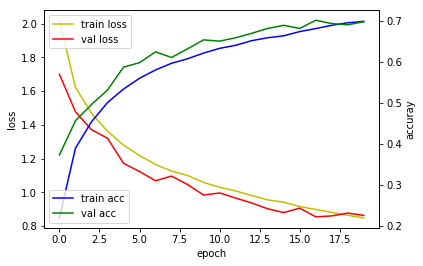

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()